Date: 09.04.2023 \
Author: Reto Hendry

## Plotting script
This script is to visualize the results of the parameter sweep.

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_theme(style="ticks", palette="pastel")

## check for duplicates with same parameters

In [12]:
tool_list = ["tpot_results_df_2xC1.csv", "h2o_results_df_2xC1.csv", "pycaret_results_df_2xC1.csv"]

for tool in tool_list:
    try:
        # analysis only for pycaret
        df = pd.read_csv(f"../results/{tool}")
        df["tool"] = tool.split("_")[0]

        # Remove duplicates ignoring the "id" field
        subset = list(df.columns)
        subset.remove("id")
        df_no_dup = df.drop_duplicates(subset=subset, keep="first")

        subset = ["component", "reshape_cube", "number_of_features", "tool"]
        df_no_param_dup = df.drop_duplicates(subset=subset, keep="first")

        print(f"tool: {tool}",
            f"shape of df before dropping duplicates: {df.shape}",
            f"shape of df after dropping duplicates: {df_no_dup.shape}",
            f"shape of df after dropping parameter duplicates: {df_no_param_dup.shape}",
            sep="\n")

        no_dup_diff = len(df_no_dup) - len(df_no_param_dup)
        print(f"there are {no_dup_diff} models with the same parameters but different results")
    except:
        print(f"!! {tool} not found")
        pass

!! tpot_results_df_2xC1.csv not found
!! h2o_results_df_2xC1.csv not found
tool: pycaret_results_df_2xC1.csv
shape of df before dropping duplicates: (180, 10)
shape of df after dropping duplicates: (90, 10)
shape of df after dropping parameter duplicates: (90, 10)
there are 0 models with the same parameters but different results


## Load results, concatenate, drop duplicates

In [13]:
# create a big dataframe with all the results from all autoML tools
tool_list = ["tpot_results_df.csv", "h2o_results_df.csv", "pycaret_results_df.csv"]

df = pd.DataFrame()

for tool in tool_list:
    df_i = pd.read_csv(f"../results/{tool}")
    df_i["tool"] = tool.split("_")[0]
    df = pd.concat([df_i, df])

In [14]:
# Remove duplicates ignoring the "id" field
subset = list(df.columns)
subset.remove("id")
df_no_dup = df.drop_duplicates(subset=subset, keep="first")

subset = ["component", "reshape_cube", "number_of_features", "tool"]
df_no_param_dup = df.drop_duplicates(subset=subset, keep="first")

print(f"shape of df before dropping duplicates: {df.shape}",
      f"shape of df after dropping duplicates: {df_no_dup.shape}",
      f"shape of df after dropping parameter duplicates: {df_no_param_dup.shape}",
      sep="\n")

no_dup_diff = len(df_no_dup) - len(df_no_param_dup)
print(f"there are {no_dup_diff} models with the same parameters but different results")

shape of df before dropping duplicates: (214, 17)
shape of df after dropping duplicates: (124, 17)
shape of df after dropping parameter duplicates: (21, 17)
there are 103 models with the same parameters but different results


## EDA

In [181]:
list(df_no_dup.columns)

['id',
 'component',
 'reshape_cube',
 'number of features',
 'CV Accuracy (Training)',
 'CV Std (Training)',
 'Accuracy (Test)',
 'F1 Score (Test)',
 'Precision Score (Test)',
 'tool']

In [182]:
df_no_param_dup.describe()

,component,reshape_cube,number of features,CV Accuracy (Training),CV Std (Training),Accuracy (Test),F1 Score (Test),Precision Score (Test)
count,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,1.0,4.333333,54.026403,0.801161,0.121880,0.674001,0.666652,0.687523
std,0.0,2.213245,28.868725,0.054059,0.029650,0.108351,0.112726,0.111984
min,1.0,1.000000,10.000000,0.611100,0.058900,0.333333,0.298701,0.292308
25%,1.0,2.000000,30.000000,0.763900,0.102081,0.611111,0.600000,0.612500
50%,1.0,4.000000,50.000000,0.805556,0.117900,0.666667,0.662500,0.675325
75%,1.0,6.000000,80.000000,0.847200,0.141600,0.722222,0.721362,0.777778
max,1.0,9.000000,100.000000,0.902778,0.216060,0.944444,0.944272,0.950000


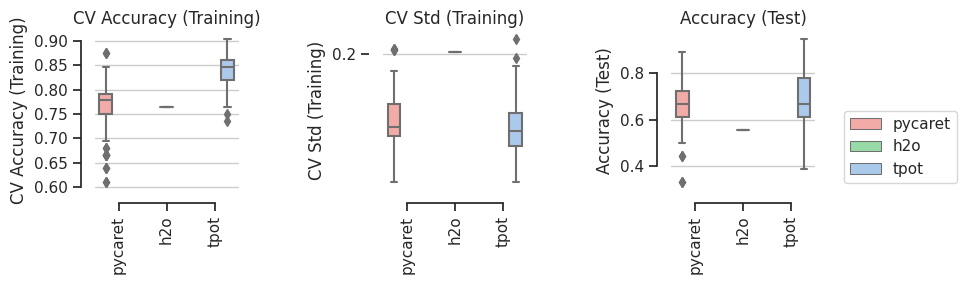

In [183]:
plot_columns = ["CV_Accuracy_(Training)", "CV_Std_(Training)", "Accuracy_(Test)"]

num_columns = len(plot_columns)
num_rows = 1
num_cols = int(np.ceil(num_columns / num_rows))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3))

# Flatten the axes array to make it easier to loop through
flat_axes = axes.flatten()

for i, col in enumerate(plot_columns):
    sns.boxplot(data=df_no_param_dup, y=col, x="tool",
                hue="tool", palette=["r", "g", "b"],
                ax=flat_axes[i])
    flat_axes[i].set_title(col)
    flat_axes[i].yaxis.grid(True)
    # flat_axes[i].set_ylim(0, 1)
    sns.despine(offset=10, trim=True)
    
    # Remove the legend for all subplots except the last one
    if i != num_columns - 1:
        flat_axes[i].get_legend().remove()
    else:
        # Place the legend outside the last subplot on the right side
        flat_axes[i].legend(bbox_to_anchor=(1.2, 0.5), loc='upper left', borderaxespad=0.)

    flat_axes[i].set_xlabel("")
    flat_axes[i].tick_params(axis='x', rotation=90)


# Remove any unused axes
for j in range(i+1, num_rows * num_cols):
    flat_axes[j].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(wspace=1)
plt.show()

## Analysis of best parameters

In [184]:
# create single dataframes for every tool
df_tpot = df_no_param_dup.loc[df["tool"] == "tpot"]
df_h2o = df_no_param_dup.loc[df["tool"] == "h2o"]
df_pycaret = df_no_param_dup.loc[df["tool"] == "pycaret"]

In [185]:
# function to plot errorbars
def plot_errorbars(x, y, yerr, color, **kwargs):
    plt.errorbar(x, y, yerr=yerr, capsize=2, fmt='none', color=color, **kwargs)

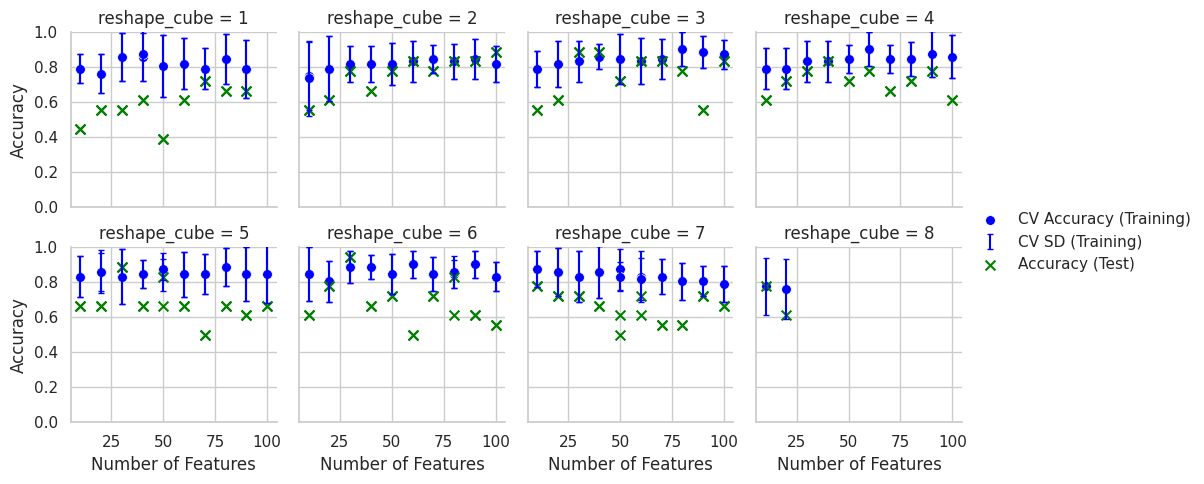

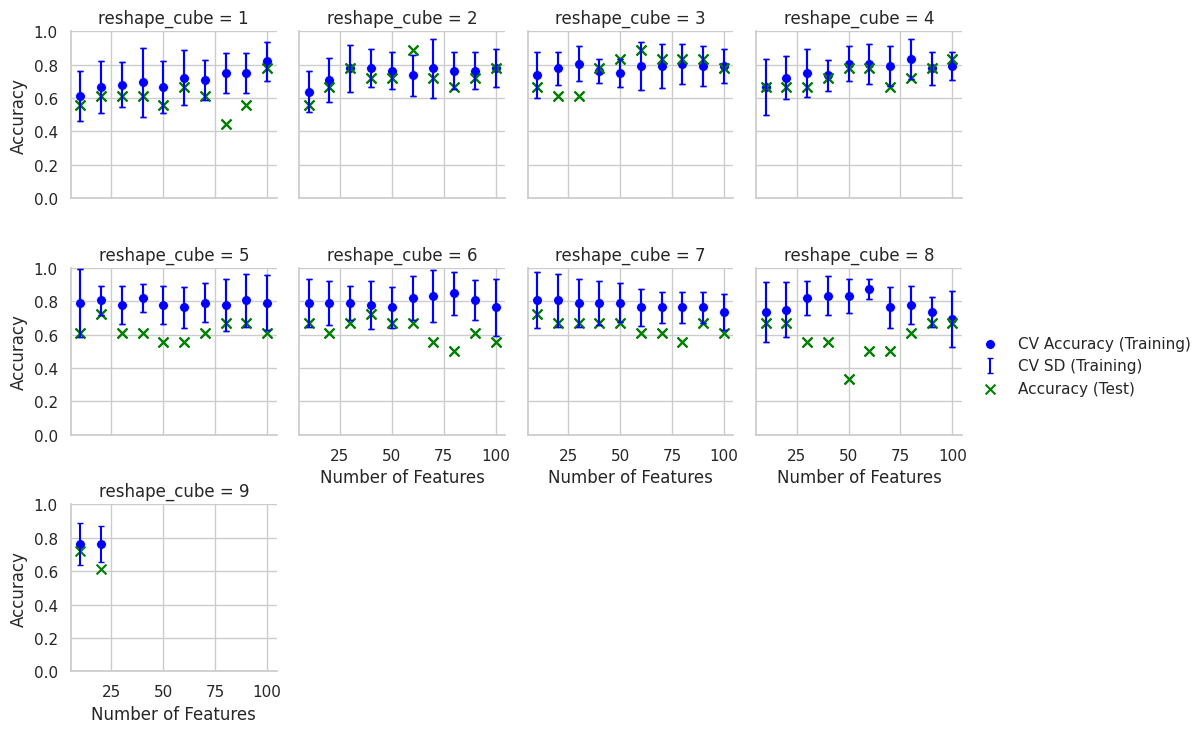

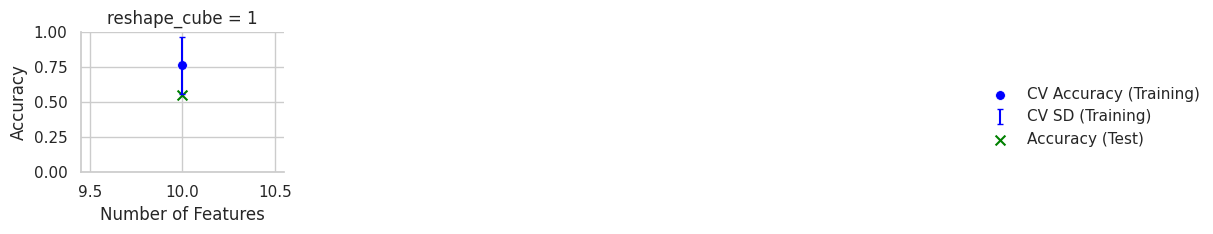

In [188]:
progression_lines = False

for data in [df_tpot, df_pycaret, df_h2o]:

    sns.set(style="whitegrid")
    g = sns.FacetGrid(data, col="reshape_cube", height=2.5, aspect=1, col_wrap=4)

    # Training data
    g.map_dataframe(sns.scatterplot, x="number_of_features", y="CV_Accuracy_(Training)", 
                    s=50, color='blue', label="CV_Accuracy_(Training)")
    g.map_dataframe(plot_errorbars, x="number_of_features", y="CV_Accuracy_(Training)", 
                    yerr="CV_Std_(Training)", color='blue', label="CV_SD_(Training)")
    if progression_lines:
        g.map_dataframe(sns.regplot, x="number_of_features", y="CV_Accuracy_(Training)",
                        scatter=False, color='blue', label="CV_Accuracy_(Training)\nreg. line", 
                        line_kws={"lw": 1, "ls": "--"})
    
    # Test data
    g.map_dataframe(sns.scatterplot, x="number_of_features", y="Accuracy_(Test)", 
                    s=50, color='green', label="Accuracy_(Test)", marker="x", linewidth=1.5)
    if progression_lines:
        g.map_dataframe(sns.regplot, x="number_of_features", y="Accuracy_(Test)",
                        scatter=False, color='green', label="Accuracy_(Test)\nreg. line", 
                        line_kws={"lw": 1, "ls": "--"})

    # format the plot
    g.set_axis_labels("number_of_features", "Accuracy")
    g.set(ylim=(0, 1))
    g.add_legend()


    plt.show()

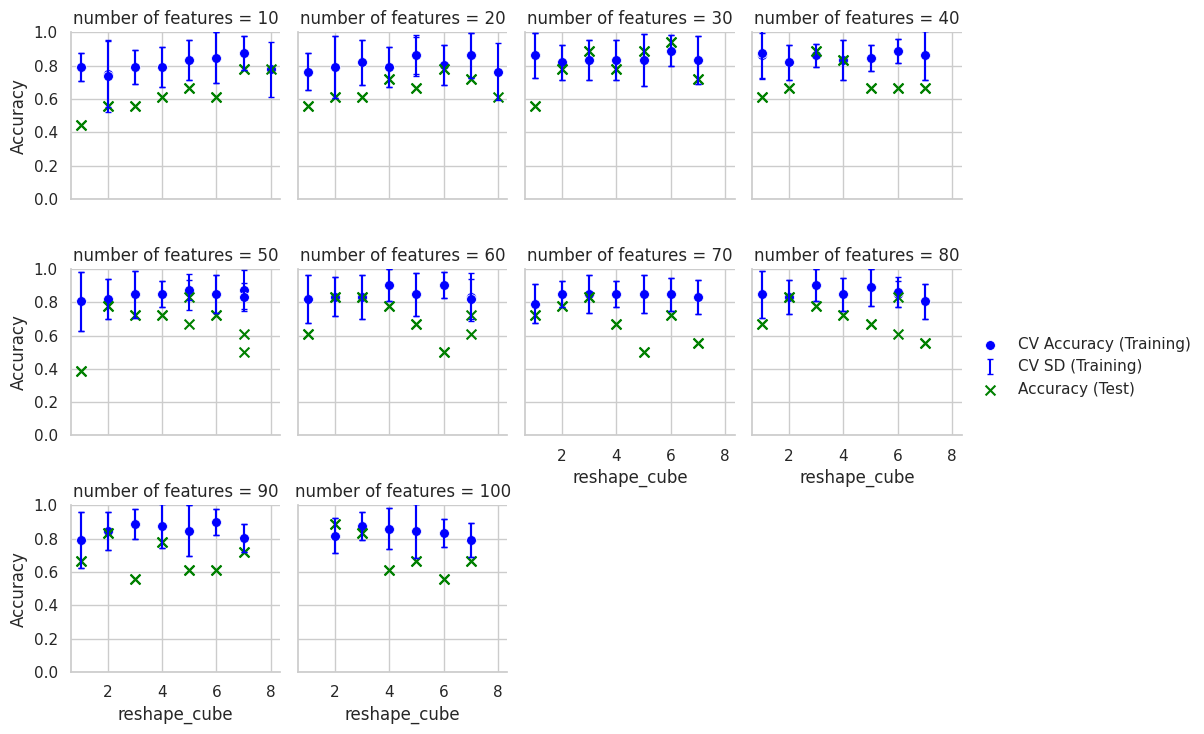

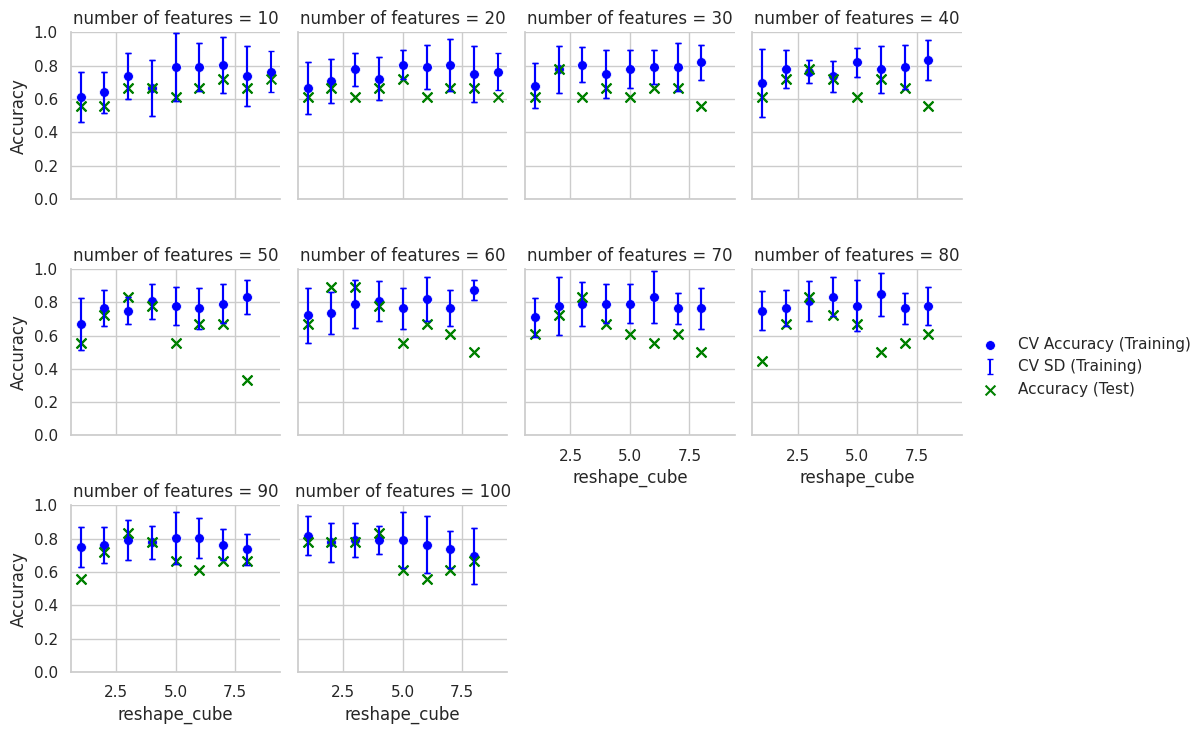

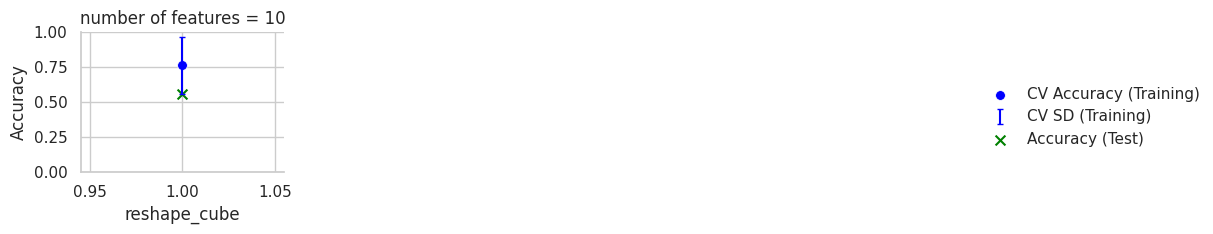

In [187]:
progression_lines = False

for data in [df_tpot, df_pycaret, df_h2o]:

    sns.set(style="whitegrid")
    g = sns.FacetGrid(data, col="number_of_features", height=2.5, aspect=1, col_wrap=4)

    # Training data
    g.map_dataframe(sns.scatterplot, x="reshape_cube", y="CV_Accuracy_(Training)", 
                    s=50, color='blue', label="CV_Accuracy_(Training)")
    g.map_dataframe(plot_errorbars, x="reshape_cube", y="CV_Accuracy_(Training)", 
                    yerr="CV_Std_(Training)", color='blue', label="CV_SD_(Training)")
    if progression_lines:
        g.map_dataframe(sns.regplot, x="reshape_cube", y="CV_Accuracy_(Training)",
                        scatter=False, color='blue', label="CV_Accuracy_(Training)\nreg. line", 
                        line_kws={"lw": 1, "ls": "--"})
    
    # Test data
    g.map_dataframe(sns.scatterplot, x="reshape_cube", y="Accuracy_(Test)", 
                    s=50, color='green', label="Accuracy_(Test)", marker="x", linewidth=1.5)
    if progression_lines:
        g.map_dataframe(sns.regplot, x="reshape_cube", y="Accuracy_(Test)",
                        scatter=False, color='green', label="Accuracy_(Test)\nreg. line", 
                        line_kws={"lw": 1, "ls": "--"})

    # format the plot
    g.set_axis_labels("reshape_cube", "Accuracy")
    g.set(ylim=(0, 1))
    g.add_legend()


    plt.show()

## plotting with different components

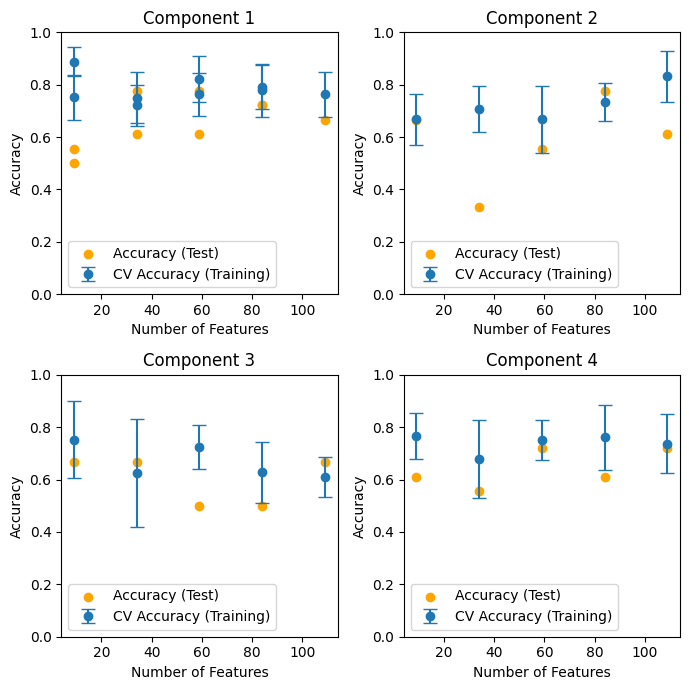

In [32]:
# filter the dataframe
df = df_no_param_dup[df_no_param_dup["reshape_cube"] == 5]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i, ax in enumerate(axes.flat):
    # Filter data for the current component
    component_data = df[df["component"] == i+1]
    
    # Plot the "CV_Accuracy_(Training)" and "Accuracy_(Test)" with error bars
    ax.errorbar(component_data["number_of_features"], 
                component_data["CV_Accuracy_(Training)"], 
                label="CV_Accuracy_(Training)", 
                yerr=component_data["CV_Std_(Training)"], 
                fmt="o", 
                capsize=5)
    ax.scatter(component_data["number_of_features"], 
               component_data["Accuracy_(Test)"], 
               label="Accuracy_(Test)",
               color="orange")
    
    # Set labels and title
    ax.set_xlabel("number_of_features")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Component {i+1}")
    
    # Add legend
    ax.legend()

    # set y limits
    ax.set_ylim(0, 1)

# Adjust subplot layout and display the plots
plt.tight_layout()
plt.show()


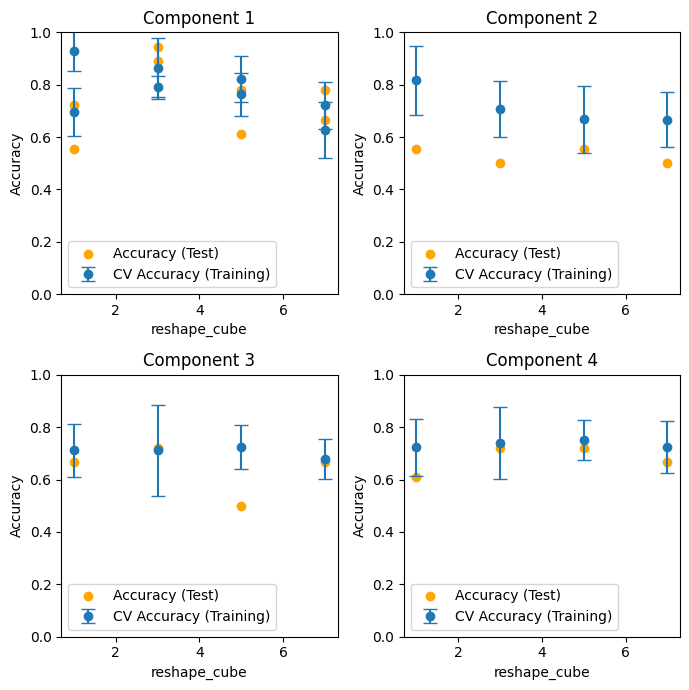

In [31]:
# filter the dataframe
df = df_no_param_dup[df_no_param_dup["number_of_features"] == 59]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i, ax in enumerate(axes.flat):
    # Filter data for the current component
    component_data = df[df["component"] == i+1]
    
    # Plot the "CV_Accuracy_(Training)" and "Accuracy_(Test)" with error bars
    ax.errorbar(component_data["reshape_cube"], 
                component_data["CV_Accuracy_(Training)"], 
                label="CV_Accuracy_(Training)", 
                yerr=component_data["CV_Std_(Training)"], 
                fmt="o", 
                capsize=5)
    ax.scatter(component_data["reshape_cube"], 
               component_data["Accuracy_(Test)"], 
               label="Accuracy_(Test)",
               color="orange")
    
    # Set labels and title
    ax.set_xlabel("reshape_cube")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Component {i+1}")
    
    # Add legend
    ax.legend()

    # set y limits
    ax.set_ylim(0, 1)

# Adjust subplot layout and display the plots
plt.tight_layout()
plt.show()
